<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Stock_3_sandy_5Min_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
#Importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [43]:
df = pd.read_csv("/content/drive/MyDrive/GL_Project_Sandy/Banknifty_5m_data_1_oct.csv")

In [44]:
df.shape

(4499, 7)

In [45]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-07-06 09:15:00+05:30,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438,0
1,2022-07-06 09:20:00+05:30,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438,0
2,2022-07-06 09:25:00+05:30,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219,0
3,2022-07-06 09:30:00+05:30,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219,0
4,2022-07-06 09:35:00+05:30,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000,0


In [ ]:
#df['Date'] = pd.to_datetime(df['Datetime'], errors='coerce')

In [46]:
df['Date'] = pd.to_datetime(df['Datetime'])

In [47]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,Date
0,2022-07-06 09:15:00+05:30,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438,0,2022-07-06 09:15:00+05:30
1,2022-07-06 09:20:00+05:30,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438,0,2022-07-06 09:20:00+05:30
2,2022-07-06 09:25:00+05:30,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219,0,2022-07-06 09:25:00+05:30
3,2022-07-06 09:30:00+05:30,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219,0,2022-07-06 09:30:00+05:30
4,2022-07-06 09:35:00+05:30,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000,0,2022-07-06 09:35:00+05:30


In [48]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df['minute'] = df['Date'].dt.minute

In [49]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,Date,year,month,day,hour,minute
0,2022-07-06 09:15:00+05:30,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438,0,2022-07-06 09:15:00+05:30,2022,7,6,9,15
1,2022-07-06 09:20:00+05:30,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438,0,2022-07-06 09:20:00+05:30,2022,7,6,9,20
2,2022-07-06 09:25:00+05:30,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219,0,2022-07-06 09:25:00+05:30,2022,7,6,9,25
3,2022-07-06 09:30:00+05:30,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219,0,2022-07-06 09:30:00+05:30,2022,7,6,9,30
4,2022-07-06 09:35:00+05:30,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000,0,2022-07-06 09:35:00+05:30,2022,7,6,9,35


Removing Time string. Take date/month/year alone for analysis

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype                                
---  ------     --------------  -----                                
 0   Datetime   4499 non-null   object                               
 1   Open       4499 non-null   float64                              
 2   High       4499 non-null   float64                              
 3   Low        4499 non-null   float64                              
 4   Close      4499 non-null   float64                              
 5   Adj Close  4499 non-null   float64                              
 6   Volume     4499 non-null   int64                                
 7   Date       4499 non-null   datetime64[ns, pytz.FixedOffset(330)]
 8   year       4499 non-null   int64                                
 9   month      4499 non-null   int64                                
 10  day        4499 non-null   int64                

In [ ]:
df.isnull().sum()

Datetime     0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Converting the data type from "object" to "datetime" for the "Datetime"

In [ ]:
print(f'DataFrame contains stock between {df.Datetime.min()} {df.Datetime.max()}')
print(f'Total numner of days = {(df.Datetime.max()- df.Datetime.min()).days} days')

In [27]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,year,month,day,hour,minute
count,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.0,4499.0,4499.000000,4499.000000,4499.000000,4499.000000
mean,38232.863543,38259.840769,38205.939855,38233.823223,38233.823223,0.0,2022.0,8.066459,16.319182,11.880196,27.197155
std,1964.348261,1965.959555,1962.130293,1963.918792,1963.918792,0.0,0.0,0.813832,8.601235,1.840845,16.992702
min,33929.398438,34074.750000,33916.101562,33992.148438,33992.148438,0.0,2022.0,7.000000,1.000000,9.000000,0.000000
25%,36712.449219,36728.974609,36674.500000,36711.701172,36711.701172,0.0,2022.0,7.000000,8.500000,10.000000,15.000000
50%,38413.000000,38450.750000,38387.199219,38414.699219,38414.699219,0.0,2022.0,8.000000,17.000000,12.000000,25.000000
75%,39513.699219,39542.724609,39492.875000,39516.650391,39516.650391,0.0,2022.0,9.000000,24.000000,13.000000,40.000000
max,41795.851562,41830.351562,41766.300781,41788.199219,41788.199219,0.0,2022.0,9.000000,30.000000,15.000000,55.000000


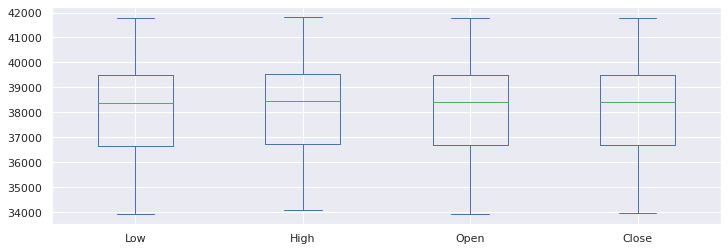

In [ ]:
df[['Low','High','Open','Close']].plot(kind= 'box', figsize=(12,4))

In [29]:
df.columns

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Date', 'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [50]:
df.drop(['Volume','Datetime','Date','year'], axis = 1, inplace = True)

In [51]:
df.head()

,Open,High,Low,Close,Adj Close,month,day,hour,minute
0,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438,7,6,9,15
1,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438,7,6,9,20
2,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219,7,6,9,25
3,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219,7,6,9,30
4,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000,7,6,9,35


In [52]:
df.nunique()

Open         4390
High         4400
Low          4393
Close        4405
Adj Close    4405
month           3
day            30
hour            7
minute         12
dtype: int64

In [37]:
df['year'].value_counts()

2022    4499
Name: year, dtype: int64

In [38]:
 df['month'].value_counts()

9    1649
8    1500
7    1350
Name: month, dtype: int64

In [39]:
 df['day'].value_counts()

8     225
12    225
19    225
29    225
26    225
22    224
30    151
6     150
7     150
23    150
16    150
5     150
2     150
1     150
28    150
27    150
25    150
21    150
20    150
18    150
15    150
14    150
11    150
13    149
3      75
4      75
10     75
17     75
24     75
9      75
Name: day, dtype: int64

In [40]:
 df['hour'].value_counts()

10    720
11    720
12    720
14    720
13    718
9     540
15    361
Name: hour, dtype: int64

In [41]:
 df['minute'].value_counts()

20    420
25    420
15    419
30    361
35    360
40    360
45    360
50    360
0     360
5     360
10    360
55    359
Name: minute, dtype: int64

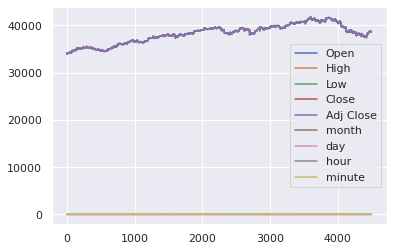

In [53]:
df.plot()

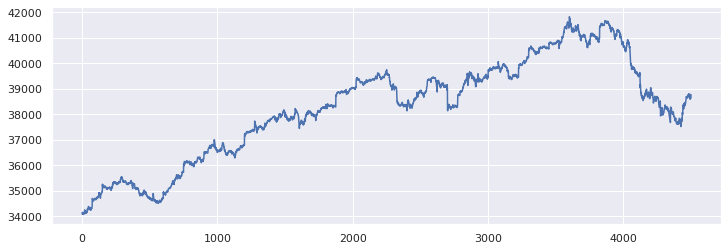

In [54]:
df['High'].plot(figsize=(12,4))

Adding some other parameter for better visualization

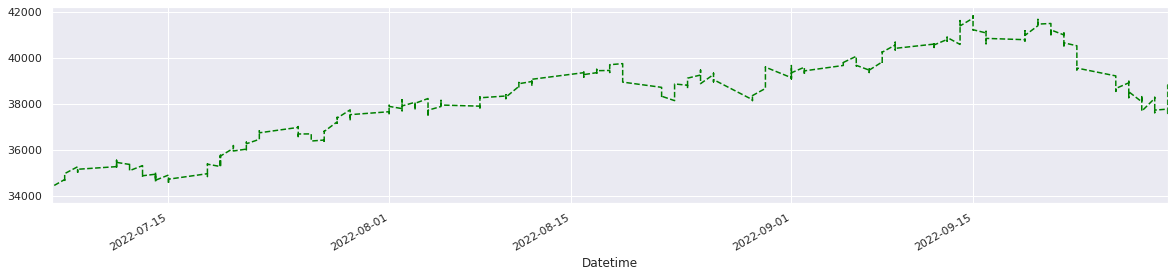

In [ ]:
df['High'].plot(xlim=['2022-07-06', '2022-09-30'], figsize=(20,4),ls='--',c='green')

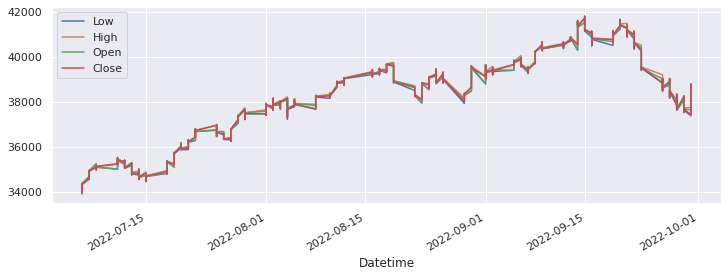

In [ ]:
df[['Low','High','Open','Close']].plot(figsize=(12,4))

Checking the details of last day or end of the year. Since we have only 3 monts of data, displyed only one record of last day of the year. Suppose If we have 5 years of data, will get the details of end of the year data seperately for 5 years. 

In [ ]:
df.resample(rule='A').min()

,Open,High,Low,Close,Adj Close
Datetime,,,,,
2022-12-31,33929.398438,34074.75,33916.101562,33992.148438,33992.148438


In [ ]:
df.resample(rule='A').max()

,Open,High,Low,Close,Adj Close
Datetime,,,,,
2022-12-31,41795.851562,41830.351562,41766.300781,41788.199219,41788.199219


Checked what is the minimum and maximum prize at the year end.

We can check how quartley the price is varying. Since we have only 3 months of data, only one record.

In [ ]:
df.resample(rule='QS').min()['High']

Datetime
2022-07-01    34074.75
Freq: QS-JAN, Name: High, dtype: float64

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 210.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


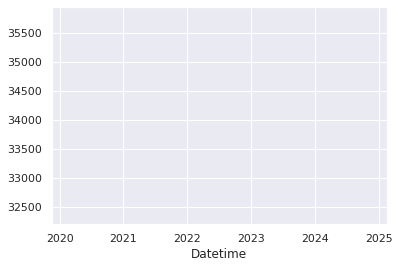

In [ ]:
df.resample(rule='QS').min()['High'].plot()

In [ ]:
df.resample(rule='QS').max()['High']

Datetime
2022-07-01    41830.351562
Freq: QS-JAN, Name: High, dtype: float64

Business End Frequency

In [ ]:
df.resample(rule='BA').max()['High']

Datetime
2022-12-30    41830.351562
Freq: BA-DEC, Name: High, dtype: float64

Business End Frequency quartley

In [ ]:
df.resample(rule='BQS').max()['High']

Datetime
2022-07-01    41830.351562
Freq: BQS-JAN, Name: High, dtype: float64

**Fetching the maximum price from lastday of Month**

In [ ]:
df['Open'].resample(rule='M').max()

Datetime
2022-07-31    37717.300781
2022-08-31    39732.648438
2022-09-30    41795.851562
Freq: M, Name: Open, dtype: float64

In [55]:
df.resample(rule='M').max().plot(kind='bar',figsize=(15,6))

TypeError: ignored

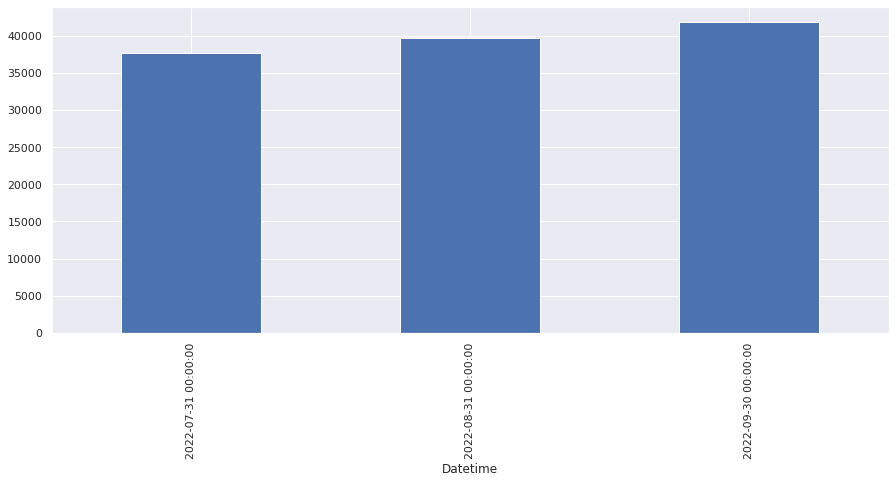

In [ ]:
df['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

**Fetching the minimum price from lastday of Month**

In [ ]:
df['Open'].resample(rule='M').min()

Datetime
2022-07-31    33929.398438
2022-08-31    37349.550781
2022-09-30    37428.148438
Freq: M, Name: Open, dtype: float64

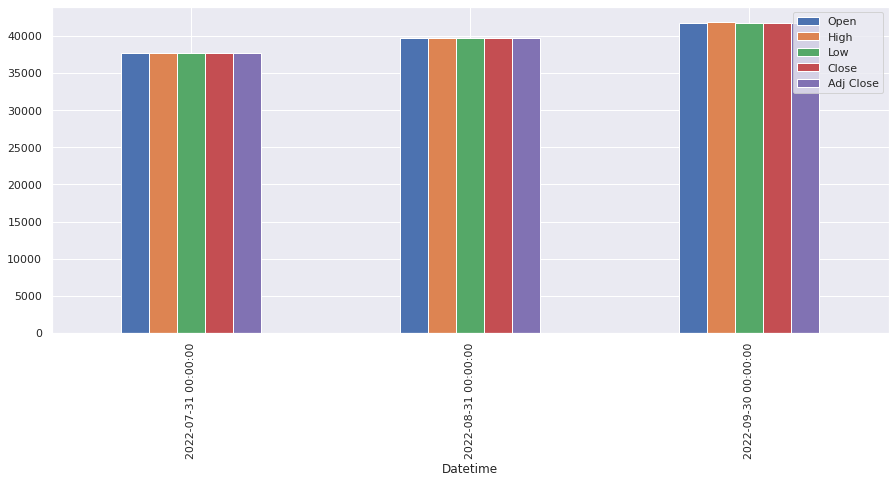

In [ ]:
df.resample(rule='M').max().plot(kind='bar',figsize=(15,6))

**Fetching the maximum price from begining of Month**

In [ ]:
df.resample(rule='MS').max()

,Open,High,Low,Close,Adj Close
Datetime,,,,,
2022-07-01,37717.300781,37737.898438,37665.550781,37696.898438,37696.898438
2022-08-01,39732.648438,39750.898438,39663.398438,39680.199219,39680.199219
2022-09-01,41795.851562,41830.351562,41766.300781,41788.199219,41788.199219


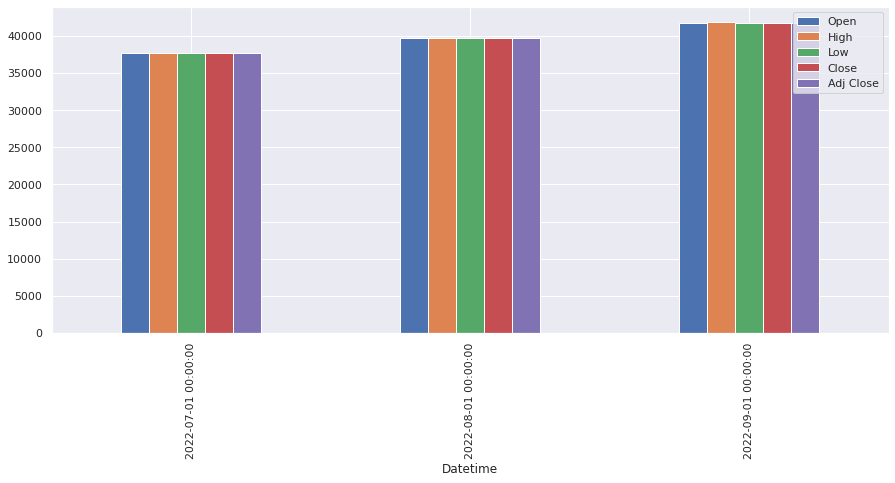

In [ ]:
df.resample(rule='MS').max().plot(kind='bar',figsize=(15,6))

Reference: https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78


**Simple Moving Average**

In [ ]:
df['Open:10 days rolling']=df['Open'].rolling(10).mean()

In [ ]:
df.head(20)

,Open,High,Low,Close,Adj Close,Open:10 days rolling
Datetime,,,,,,
2022-07-06,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438,NaN
2022-07-06,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438,NaN
2022-07-06,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219,NaN
2022-07-06,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219,NaN
2022-07-06,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000,NaN
2022-07-06,34093.550781,34102.050781,33988.800781,33992.148438,33992.148438,NaN
2022-07-06,33997.500000,34107.148438,33962.851562,34107.148438,34107.148438,NaN
2022-07-06,34108.699219,34138.800781,34098.250000,34117.101562,34117.101562,NaN
2022-07-06,34118.300781,34122.648438,34051.000000,34060.300781,34060.300781,NaN


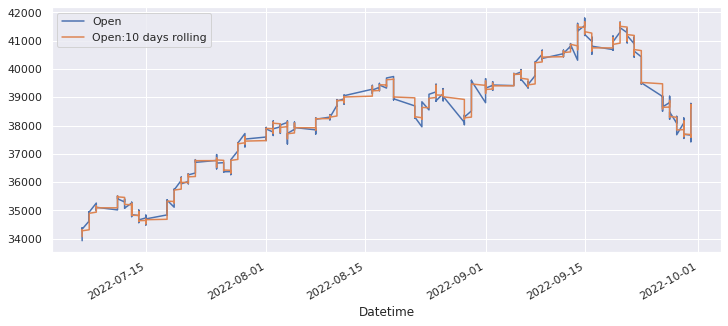

In [ ]:
df[['Open','Open:10 days rolling']].plot(figsize=(12,5))

In [ ]:
df['Open:30 days rolling']=df['Open'].rolling(30).mean()

In [ ]:
df.head(33)

,Open,High,Low,Close,Adj Close,Open:10 days rolling,Open:30 days rolling
Datetime,,,,,,,
2022-07-06,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438,NaN,NaN
2022-07-06,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438,NaN,NaN
2022-07-06,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219,NaN,NaN
2022-07-06,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219,NaN,NaN
2022-07-06,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000,NaN,NaN
2022-07-06,34093.550781,34102.050781,33988.800781,33992.148438,33992.148438,NaN,NaN
2022-07-06,33997.500000,34107.148438,33962.851562,34107.148438,34107.148438,NaN,NaN
2022-07-06,34108.699219,34138.800781,34098.250000,34117.101562,34117.101562,NaN,NaN
2022-07-06,34118.300781,34122.648438,34051.000000,34060.300781,34060.300781,NaN,NaN


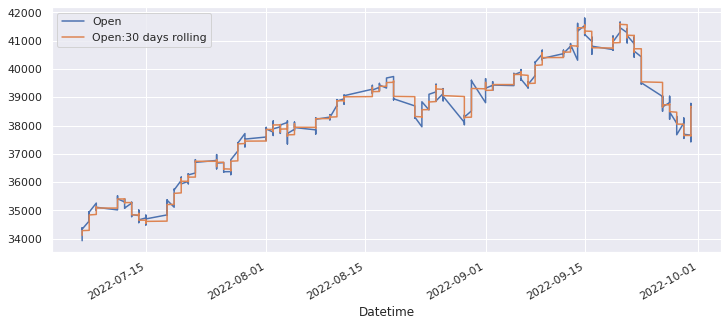

In [ ]:
df[['Open','Open:30 days rolling']].plot(figsize=(12,5))

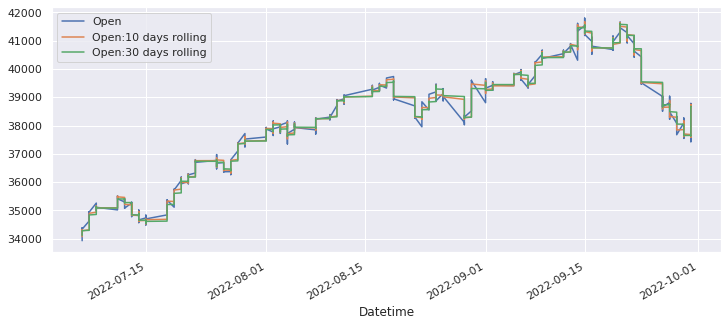

In [ ]:
df[['Open','Open:10 days rolling','Open:30 days rolling']].plot(figsize=(12,5))

MITO is one of the widely use Auto EDA tool which will be specificall used for Finacial Data and stock market data.

Exception: The mitosheet currently only works in JupyterLab.


!pip install mitoinstaller
!pip install mitosheet
import mitosheet

Splitting X and Y

In [56]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [60]:
df.head()

,Open,High,Low,Close,Adj Close,month,day,hour,minute
0,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438,7,6,9,15
1,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438,7,6,9,20
2,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219,7,6,9,25
3,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219,7,6,9,30
4,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000,7,6,9,35


In [58]:
X = df.loc[:, ['Open', 'High', 'Low', 'Close','month', 'day', 'hour','minute']]
Y = df['Adj Close']

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size = 0.25, random_state = 42)

In [65]:
print(X_train.shape) 
print(X_test.shape) 
print(Y_train.shape) 
print(Y_test.shape)

(3374, 8)
(1125, 8)
(3374,)
(1125,)


In [66]:
#Try with Linear Regression

from sklearn.linear_model import LinearRegression
Linear_Reg = LinearRegression()
Linear_Reg.fit(X_train, Y_train)

LinearRegression()

In [67]:
print(Linear_Reg.intercept_)
print(Linear_Reg.coef_)

33992.1484375
[ 7.98654778e-11 -1.63709046e-11 -7.41238182e-11  7.79605078e+03
 -1.36424205e-12 -1.63780101e-12  8.52296012e-12  6.83630930e-12]


In [68]:
y_pred_lr = Linear_Reg.predict(X_test)

In [69]:
from sklearn import metrics

In [70]:
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred_lr))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_lr)))

MAE: 5.723753323157628e-12
MSE: 5.181018194038804e-23
RMSE: 7.197929003566792e-12


In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(Y_test, y_pred_lr)
MSE

2.0705249821771786e-24

In [71]:
Lr_results = pd.DataFrame({'Actual_prize':Y_test, 'Predicted_Prize':y_pred_lr})

In [72]:
print(Lr_results)

      Actual_prize  Predicted_Prize
1632  37625.000000     37625.000000
3685  40869.000000     40869.000000
2973  39481.898438     39481.898438
2991  39389.550781     39389.550781
468   34886.750000     34886.750000
...            ...              ...
1114  36457.050781     36457.050781
63    34225.398438     34225.398438
2452  38544.351562     38544.351563
2740  38321.449219     38321.449219
2251  39579.949219     39579.949219

[1125 rows x 2 columns]


In [74]:
graph = Lr_results.head(20)

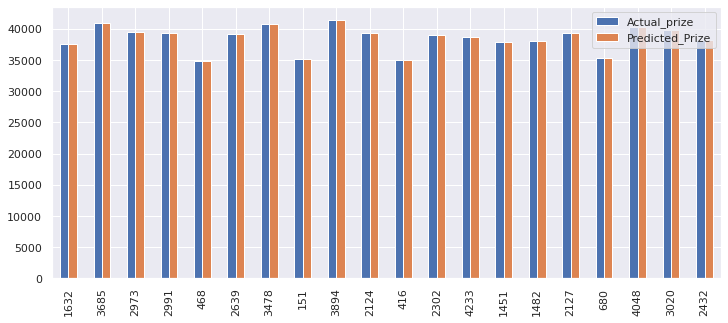

In [75]:
graph.plot(kind='bar', figsize =(12,5))

**LSTM**

In [76]:
df.head()

,Open,High,Low,Close,Adj Close,month,day,hour,minute
0,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438,7,6,9,15
1,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438,7,6,9,20
2,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219,7,6,9,25
3,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219,7,6,9,30
4,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000,7,6,9,35


In [80]:
Adj_close = df[['Adj Close','minute']]

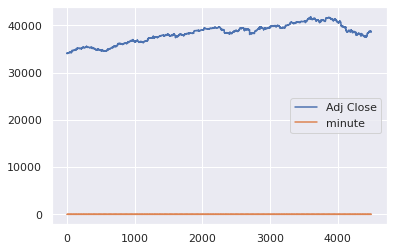

In [81]:
Adj_close.plot()

In [82]:
normalizer = MinMaxScaler(feature_range=(0,1))
Adj_close_scaled = normalizer.fit_transform(np.array(Adj_close).reshape(-1,1))

In [83]:
#Defining test and train data sizes
train_size = int(len(Adj_close_scaled)*0.70)
test_size = len(Adj_close_scaled) - train_size

In [84]:
train_size,test_size

(6298, 2700)

In [85]:
ds_train, ds_test = Adj_close_scaled[0:train_size,:], Adj_close_scaled[train_size:len(Adj_close_scaled),:1]

In [86]:
len(ds_train),len(ds_test)

(6298, 2700)

In [87]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [88]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [89]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape


((6197, 100), (6197,), (2599, 100), (2599,))

In [90]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [91]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [92]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [94]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=100)

Epoch 1/10
62/62 [==============================] - 24s 274ms/step - loss: 0.2054 - val_loss: 0.2315
Epoch 2/10
62/62 [==============================] - 17s 281ms/step - loss: 0.2020 - val_loss: 0.2275
Epoch 3/10
62/62 [==============================] - 15s 248ms/step - loss: 0.1197 - val_loss: 0.0020
Epoch 4/10
62/62 [==============================] - 17s 282ms/step - loss: 6.3642e-04 - val_loss: 0.0021
Epoch 5/10
62/62 [==============================] - 16s 251ms/step - loss: 4.9247e-04 - val_loss: 9.7511e-04
Epoch 6/10
62/62 [==============================] - 15s 250ms/step - loss: 3.3854e-04 - val_loss: 6.6694e-04
Epoch 7/10
62/62 [==============================] - 16s 253ms/step - loss: 2.5671e-04 - val_loss: 1.5469e-04
Epoch 8/10
62/62 [==============================] - 16s 251ms/step - loss: 1.6647e-04 - val_loss: 2.6011e-04
Epoch 9/10
62/62 [==============================] - 16s 254ms/step - loss: 1.2788e-04 - val_loss: 1.5937e-04
Epoch 10/10
62/62 [============================

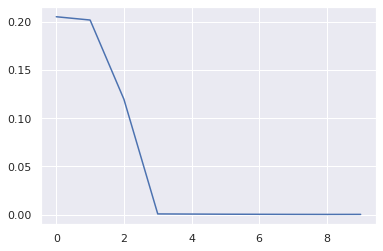

In [95]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [96]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

82/82 [==============================] - 3s 37ms/step


In [97]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

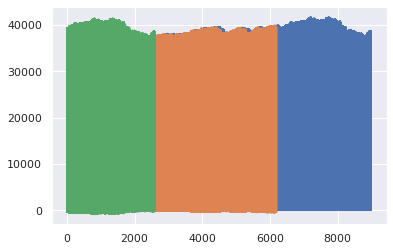

In [98]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(Adj_close_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [ ]:
type(train_predict)

numpy.ndarray

In [99]:
test = np.vstack((train_predict,test_predict))

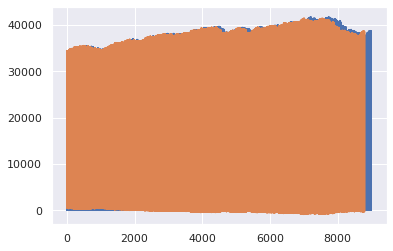

In [100]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(Adj_close_scaled))
plt.plot(test)

In [101]:
len(ds_test)

2700

In [105]:
#Getting the last 100 days records
fut_inp = ds_test[2600:]

In [106]:
tmp_inp = list(fut_inp)

In [107]:
fut_inp.shape

(100, 1)

In [108]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [109]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852], [0.923721432685852]]


In [110]:
len(Adj_close_scaled)

8998

In [111]:
ds_new = Adj_close_scaled.tolist()

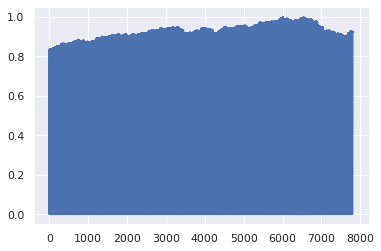

In [112]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [113]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

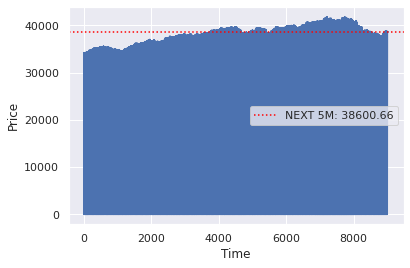

In [115]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 5M: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()